<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Outlier Analysis</p> 

  + Outliers can be of two types: Univariate and Multivariate. 
  + **Univariate outliers can be found when we look at distribution of a single variable.** 
  + **Multi-variate outliers are outliers in an n-dimensional space.** 

### Different outlier detection technique
+ Hypothesis Testing
+ Z-score method 
+ Robust Z-score 
+ I.Q.R method  
+ Winsorization method(Percentile Capping) 
+ DBSCAN Clustering 
+ Isolation Forest  
+ Visualizing the data 

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Hypothesis Testing</p> 

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd 
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn import preprocessing
import scipy

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

import Preparing_Dataset_for_BatchProcessing
import imp
imp.reload(Preparing_Dataset_for_BatchProcessing)
import Preparing_Dataset_for_BatchProcessing as r5
lat = 22.18
lon = 73.18
Data = r5.Data_Batch_2020(lat,lon)

# **Grubbs' test
+ Ho: There are no outliers in the data set. 
+ H1: There is exactly one outlier in the data set.
+ The Grubbs' test statistic is defined as:
$$
G_{calculated}=\frac{\max \left|X_{i}-\overline{X}\right|}{STD}
$$

$$
G_{critical}=\frac{(N-1)}{\sqrt{N}} \sqrt{\frac{\left(t_{\alpha /(2 N), N-2}\right)^{2}}{N-2+\left(t_{\alpha /(2 N), N-2}\right)^{2}}}
$$

+ If the calculated value is greater than critical, reject the null hypothesis and conclude that one of the values is an outlier.

In [2]:
def Grubbs_test(data):
    n = len(data)
    mean_data = np.mean(data)
    sd_data   = np.std(data)
    
    numerator = max(abs(data-mean_data))
    g_calculated = numerator/sd_data
    print("Calculated Value:",g_calculated)
    
    t_value = stats.t.ppf(1-0.05/(2*n),n-2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Critical Value:",g_critical)
    
    if g_calculated < g_critical:
        print("Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("Reject null hypothesis and conclude that there is an outliers\n")

In [3]:
Variables = (Data.keys())[:-1]
Variables

Index(['SR_eff', 'SP_I', 'sp_lat', 'sp_lon', 'LAI'], dtype='object')

In [4]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print('Gribbs Test Statistics for:',Variables[i])
    Grubbs_test(df)

Gribbs Test Statistics for: SR_eff
Calculated Value: 3.866148517948037
Critical Value: 4.281255802929796
Accept null hypothesis and conclude that there is no outliers

Gribbs Test Statistics for: SP_I
Calculated Value: 2.290906360734394
Critical Value: 4.281255802929796
Accept null hypothesis and conclude that there is no outliers

Gribbs Test Statistics for: sp_lat
Calculated Value: 1.726345837715436
Critical Value: 4.281255802929796
Accept null hypothesis and conclude that there is no outliers

Gribbs Test Statistics for: sp_lon
Calculated Value: 1.792830353275348
Critical Value: 4.281255802929796
Accept null hypothesis and conclude that there is no outliers

Gribbs Test Statistics for: LAI
Calculated Value: 3.246691650896826
Critical Value: 4.281255802929796
Accept null hypothesis and conclude that there is no outliers



<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Z-score method</p>

+ Using Z score method,we can find out how many standard deviations value away from the mean. </font></div> 
+ Z-score formula

$${Z score=\frac{ X - Mean}{STD}}$$

+ If the z score of a data point is more than 3 (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. 
+ It is taken as outliers.

In [5]:
def Zscore_outlier(df):
    m  = np.mean(df)
    sd = np.std(df)
    Outliers = []
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            Outliers.append(i)
    return len(Outliers)

In [6]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Number of outliers for {Variables[i]} : {Zscore_outlier(df)}')

Number of outliers for SR_eff : 61
Number of outliers for SP_I : 0
Number of outliers for sp_lat : 0
Number of outliers for sp_lon : 0
Number of outliers for LAI : 11


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Robust Z-score method</p>

+ It is also called as Median absolute deviation method. 
+ Since mean and standard deviations are heavily influenced by outliers
+ So we use median and absolute deviation from median. 
+ Robust Z-score formula 
$$
{R.Z.score=\frac{0.6745*( X_{i} - Median)}{MAD}}
$$
Where, 
$$
MAD = median(|X-median|)
$$
+ Suppose X follows a standard normal distribution. 
+ The MAD will converge to the median of the half normal distribution
+ Which is the 75 percentile of a normal distribution
+ N(0.75)≃0.6745

In [7]:
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    Outliers = []
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            Outliers.append(i)
    return len(Outliers)

In [8]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Number of outliers for {Variables[i]} : {ZRscore_outlier(df)}')

Number of outliers for SR_eff : 71
Number of outliers for SP_I : 0
Number of outliers for sp_lat : 0
Number of outliers for sp_lon : 0
Number of outliers for LAI : 823


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">IQR method</p>

+ In this method by using Inter Quartile Range(IQR), we detect outliers. 
+ IQR tells us the variation in the data set.
+ Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers 
<img style="float: center;"  src=" https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" width="400px">

+ Q1 represents the 1st quartile or 25th percentile of the data.
+ Q2 represents the 2nd quartile or median or 50th percentile of the data.
+ Q3 represents the 3rd quartile or 75th percentile of the data. 
+ (Q1–1.5IQR) represent the smallest value in the data set and (Q3+1.5IQR) represnt the largest value in the data set.

In [9]:
def IQR_Outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    Outliers = []
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            Outliers.append(i)
    return len(Outliers)

In [10]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Number of outliers for {Variables[i]} : {IQR_Outliers(df)}')

Number of outliers for SR_eff : 177
Number of outliers for SP_I : 0
Number of outliers for sp_lat : 0
Number of outliers for sp_lon : 0
Number of outliers for LAI : 208


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Winsorization Method</p>

+ This method is similar to IQR method. 
+ Also known as Percentile Capping.
+ If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.

In [11]:
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    Outliers = []
    for i in df:
        if i > q3 or i < q1:
            Outliers.append(i)
    return len(Outliers)

In [12]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Number of outliers for {Variables[i]} : {Winsorization_outliers(df)}')

Number of outliers for SR_eff : 56
Number of outliers for SP_I : 56
Number of outliers for sp_lat : 56
Number of outliers for sp_lon : 56
Number of outliers for LAI : 28


+ Winsorization Method or Percentile Capping is the better outlier detection technique than the others.

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">DBSCAN</p>

+ Density - Based Spatial Clustering of Applications with Noise
  + DBSCAN is a density based clustering algorithm that divides a dataset into subgroups of high density regions and identifies high density regions cluster as outliers.  
  + This approach is similar to the K-mean clustering. 
  + **DBSCAN give best result for multivariate outlier detection.**

+ Epsilon:  a distance parameter that defines the radius to search for nearby neighbors.
+ Minimum number of points required to form a cluster. 

<img style="float: center;"  src="https://qphs.fs.quoracdn.net/main-qimg-384458d7ab61f88e443b5e99bcd06622" width="350px">

+ Using Epsilon and minPts, we can classify each data point as:
  + a point that has at least a minimum number of other points (minPts) within its radius.
  + a point is within the  radius of a core point but has less than the minimum number of other points (minPts) within its own radius.
+ Noise point –> a point that is neither a core point or a border point.

In [13]:
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(np.array(df).reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster'].value_counts().sort_values(ascending=False)

In [14]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Outliers for {Variables[i]} : \n{DB_outliers(df[:10000])}')
    print('\n')

Outliers for SR_eff : 
0    2773
Name: cluster, dtype: int64


Outliers for SP_I : 
0    2773
Name: cluster, dtype: int64


Outliers for sp_lat : 
0    2773
Name: cluster, dtype: int64


Outliers for sp_lon : 
0    2773
Name: cluster, dtype: int64


Outliers for LAI : 
0    2773
Name: cluster, dtype: int64




+ DBSCAN is not good for more than 10,000 data points.

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Isolation Forest</p>

+ It is an clustering algorithm that belongs to the ensemble decision trees family and is similar in principle to Random Forest. 

<hr>
<img style="float: center;"  src="https://miro.medium.com/max/875/0*0GuMixLdSZo3V3Nh." width="450px">
<hr> 

1. It classify the data point to outlier and not outliers and works great with very high dimensional data.
2. It works based on decision tree and it isolate the outliers.
3. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier. 

In [15]:
def Iso_outliers(df):
    iso = IsolationForest(random_state = 1, contamination= 'auto')
    preds = iso.fit_predict(np.array(df).reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False)) 

In [16]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Outliers for {Variables[i]} :')
    Iso_outliers(df)
    print('\n')

Outliers for SR_eff :
 1    2072
-1     701
Name: cluster, dtype: int64


Outliers for SP_I :
 1    1428
-1    1345
Name: cluster, dtype: int64


Outliers for sp_lat :
-1    1841
 1     932
Name: cluster, dtype: int64


Outliers for sp_lon :
-1    1430
 1    1343
Name: cluster, dtype: int64


Outliers for LAI :
 1    1950
-1     823
Name: cluster, dtype: int64




<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Visualizing the data</p>

+ Box and whisker plot   
+ Scatter plot    
+ Histogram
+ Distribution Plot    
+ QQ plot

## **Box and whisker plot 

In [17]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()

Box_plots for SR_eff :


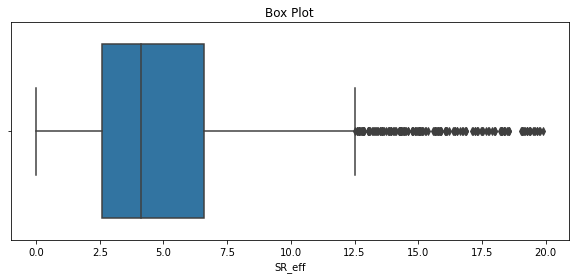



Box_plots for SP_I :


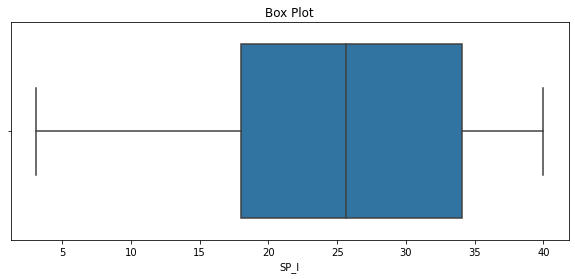



Box_plots for sp_lat :


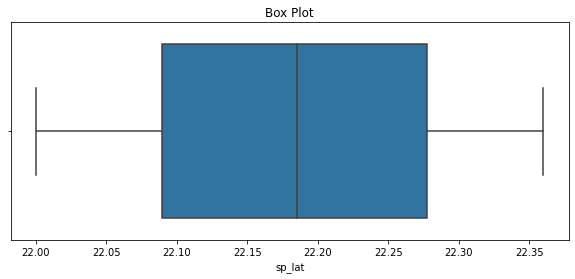



Box_plots for sp_lon :


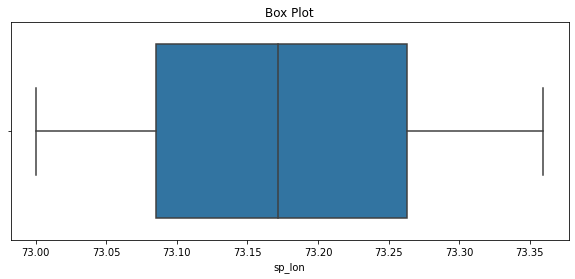



Box_plots for LAI :


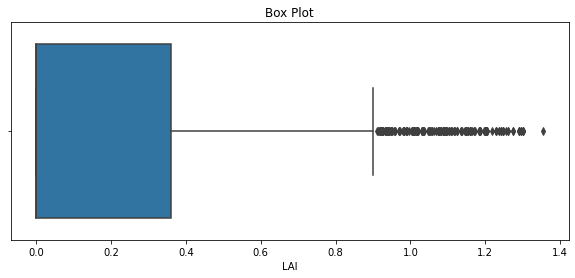

In [18]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Box_plots for {Variables[i]} :')
    Box_plots(df)
    print('\n')

## **Histogram

In [19]:
def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()

hist_plots for SR_eff :


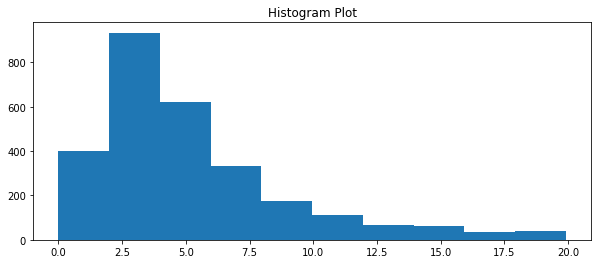



hist_plots for SP_I :


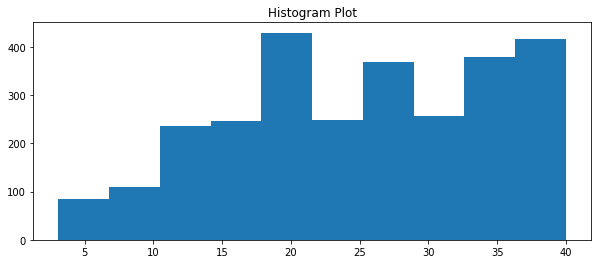



hist_plots for sp_lat :


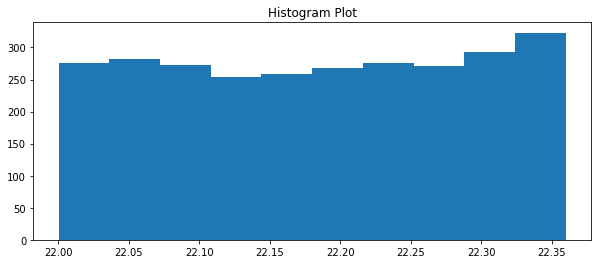



hist_plots for sp_lon :


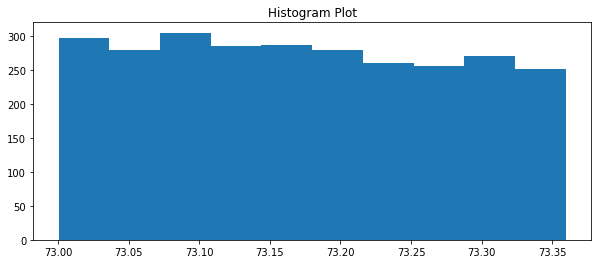



hist_plots for LAI :


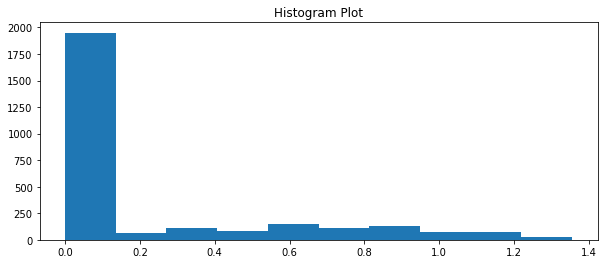

In [20]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'hist_plots for {Variables[i]} :')
    hist_plots(df)
    print('\n')

## **Scatter plot

In [21]:
def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Soil Moisture')
    plt.title("Scatter Plot")
    plt.show()

scatter_plots for SP_I with Day_No:


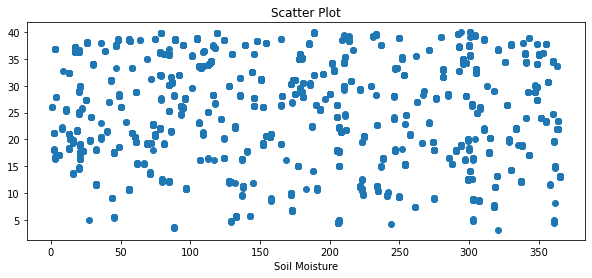



scatter_plots for sp_lat with Day_No:


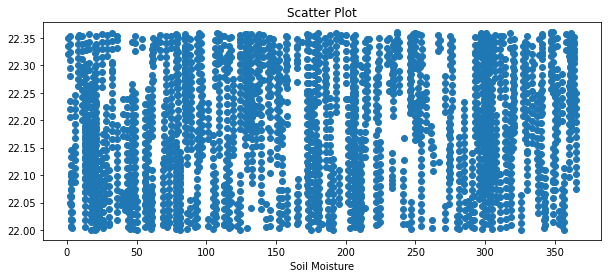



scatter_plots for sp_lon with Day_No:


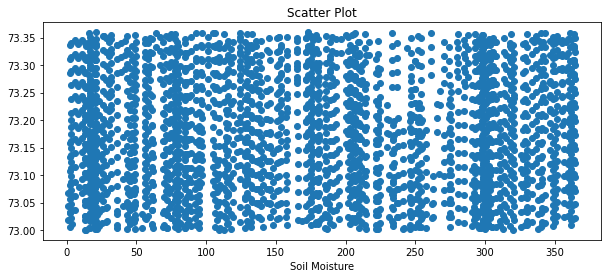



scatter_plots for LAI with Day_No:


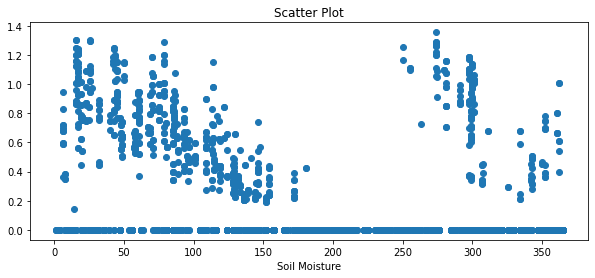

In [22]:
for i in range(1,len(Variables)):
    df1 = Data[f'{(Data.keys())[-1]}']
    df2 = Data[f'{Variables[i]}']
    print(f'scatter_plots for {Variables[i]} with {(Data.keys())[-1]}:')
    scatter_plots(df1,df2)
    print('\n')

## **Distribution Plot

In [23]:
def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()

dist_plots for SR_eff :


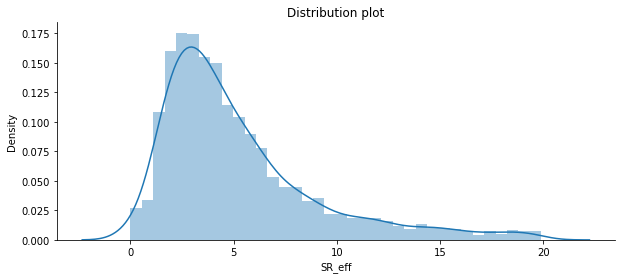



dist_plots for SP_I :


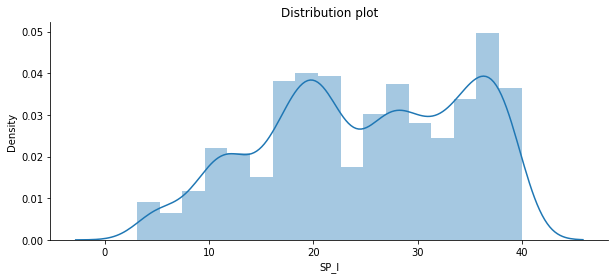



dist_plots for sp_lat :


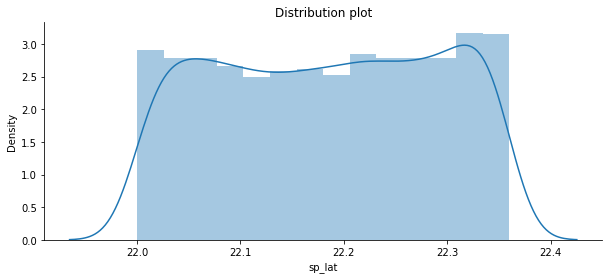



dist_plots for sp_lon :


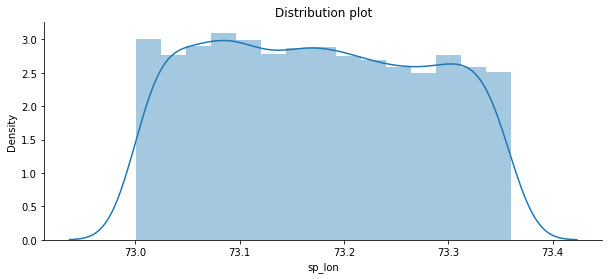



dist_plots for LAI :


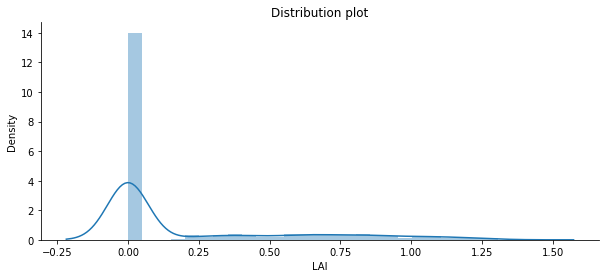

In [24]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'dist_plots for {Variables[i]} :')
    dist_plots(df)
    print('\n')

## **QQ plot

In [25]:
def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()

qq_plots for SR_eff :


<Figure size 720x288 with 0 Axes>

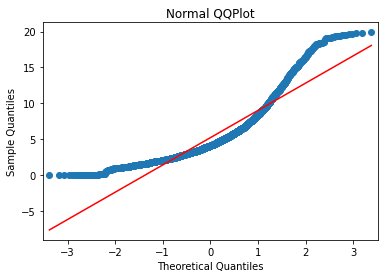



qq_plots for SP_I :


<Figure size 720x288 with 0 Axes>

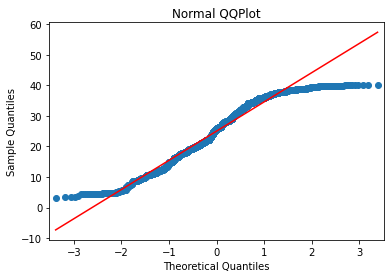



qq_plots for sp_lat :


<Figure size 720x288 with 0 Axes>

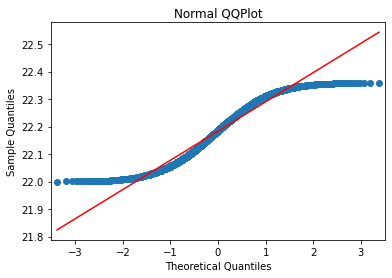



qq_plots for sp_lon :


<Figure size 720x288 with 0 Axes>

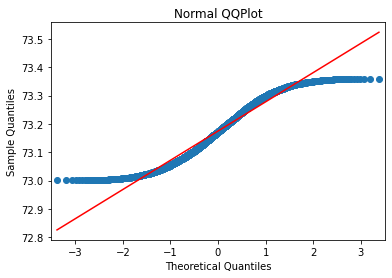



qq_plots for LAI :


<Figure size 720x288 with 0 Axes>

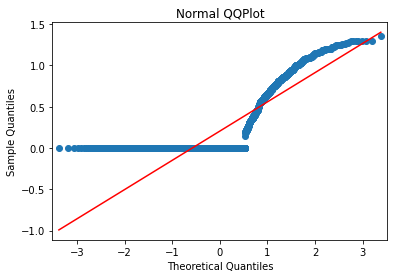

In [26]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'qq_plots for {Variables[i]} :')
    qq_plots(df)
    print('\n')

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Outliers Removing</p>

+ Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.  
+ It increases the error variance and reduces the power of statistical tests.    
+ If the outliers are non-randomly distributed, they can decrease normality. 
+ Most machine learning algorithms do not work well in the presence of outlier. 
+ So it is desirable to detect and remove outliers.    
+ They can also impact the basic assumption of Regression and other statistical models.  

+ There are some techniques used to deal with outliers.
  + Deleting observations.    
  + Transforming values. 
  + Imputation.  
  + Separately treating 

# **Deleting observations: 

+ We delete outlier values if it is due to data entry error, data processing error 
+ Or outlier observations are very small in numbers. 
+ We can also use trimming at both ends to remove outliers. 
+ But deleting the observation is not a good idea when we have small dataset.

In [27]:
df_1 = Data.copy()
df_1.head()

,SR_eff,SP_I,sp_lat,sp_lon,LAI,Day_No
0,2.258991,25.992270,22.320475,73.01782,0.0,1.0
1,15.148935,26.007290,22.334988,73.04304,0.0,1.0
2,3.463377,26.022331,22.349500,73.06825,0.0,1.0
0,4.122522,17.971296,22.048311,73.00603,0.0,2.0
1,5.604214,17.982008,22.062685,73.03139,0.0,2.0


In [28]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

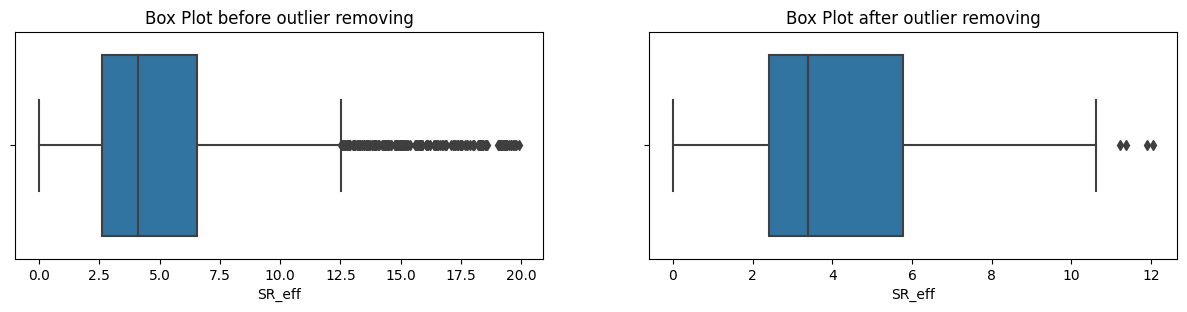

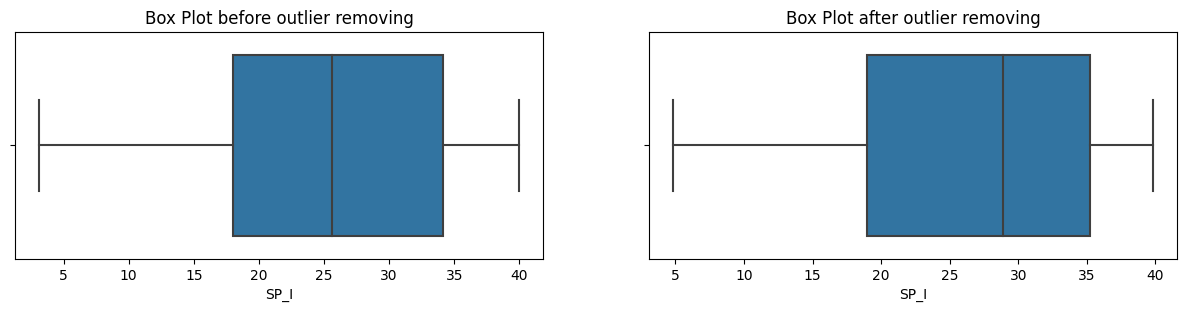

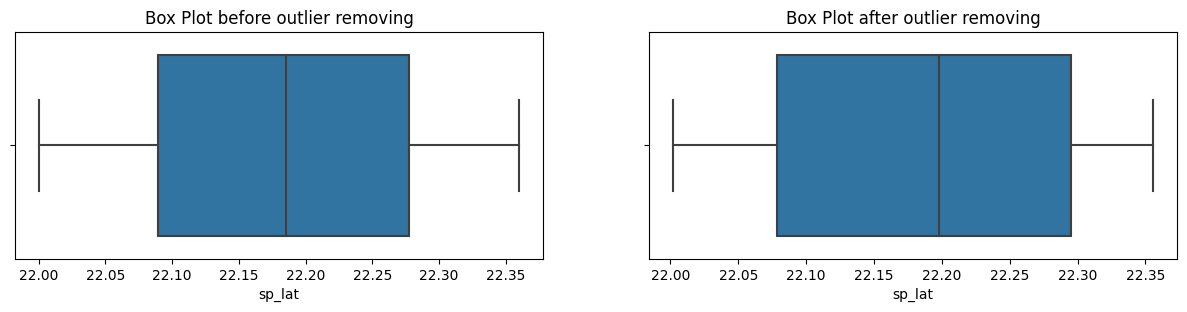

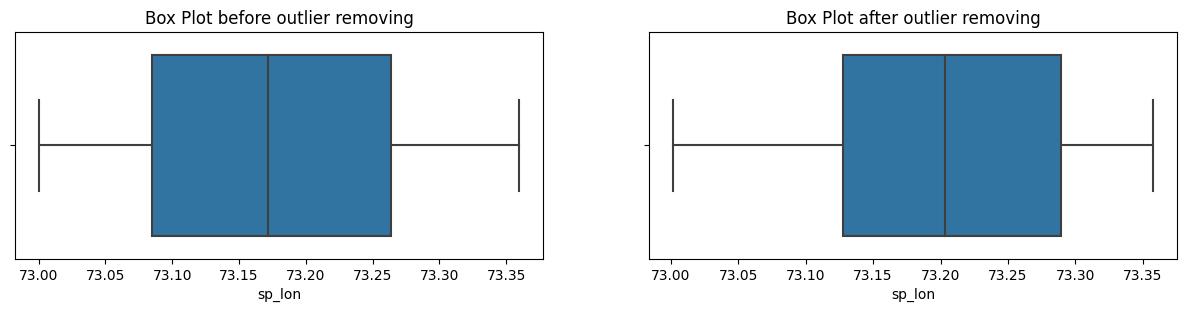

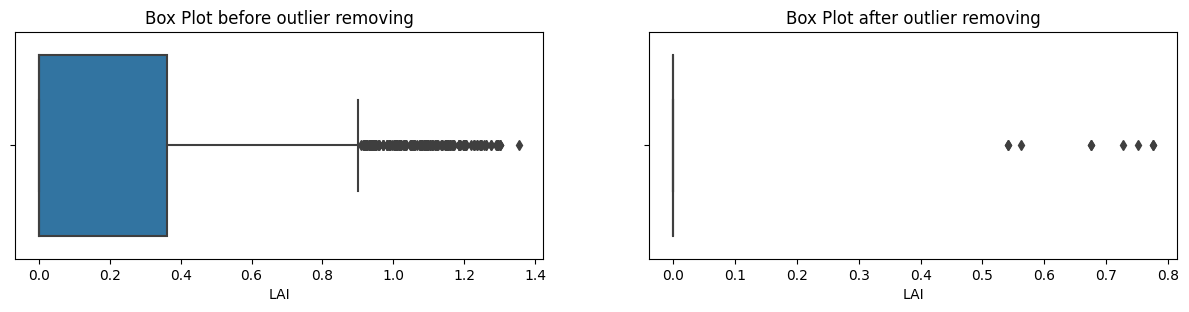

In [29]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.title(f"Box Plot before outlier removing")
    plt.subplot(1,2,2)
    drop_outliers(df_1, f'{Variables[i]}')
    sns.boxplot(df_1[f'{Variables[i]}'])
    plt.title("Box Plot after outlier removing")
    plt.show()

# **Transforming values:
+ Transforming variables can also eliminate outliers. 
+ These transformed values reduces the variation caused by extreme values.
  + Scalling     
  + Log transformation
  + Cube Root Normalization  
  + Box-Cox transformation
+ These techniques convert values in the dataset to smaller values. 
+ If the data has to many extreme values or skewed, this method helps to make your data normal.     
+ But These technique not always give you the best results. 
+ There is no lose of data from these methods.    
+ In all these method boxcox transformation gives the best result

## **Scaling

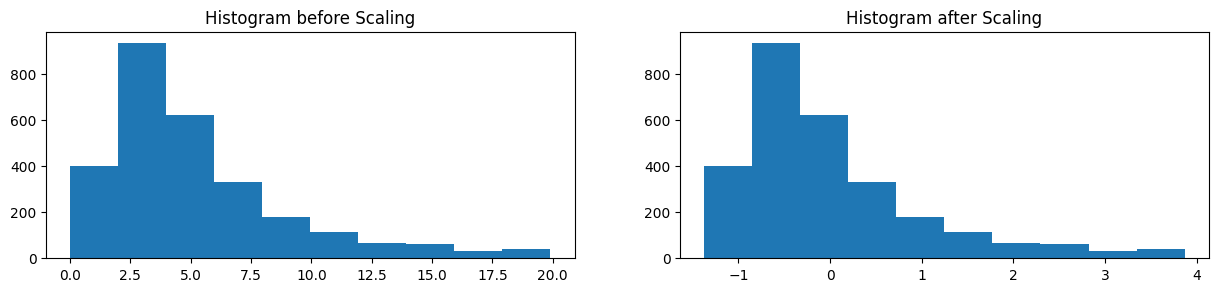

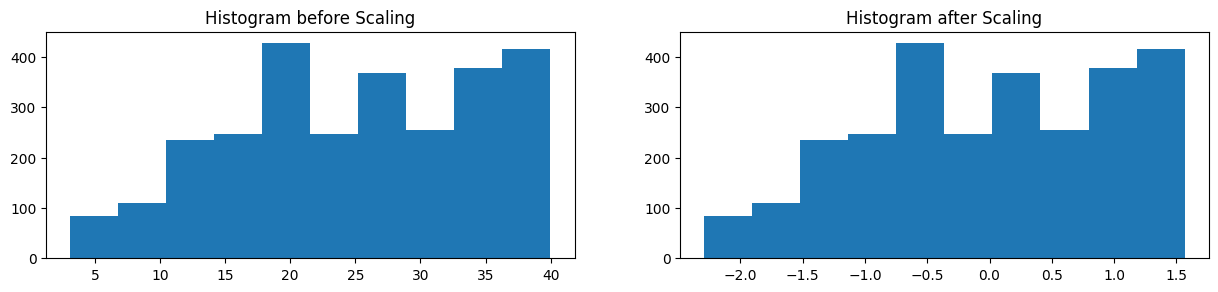

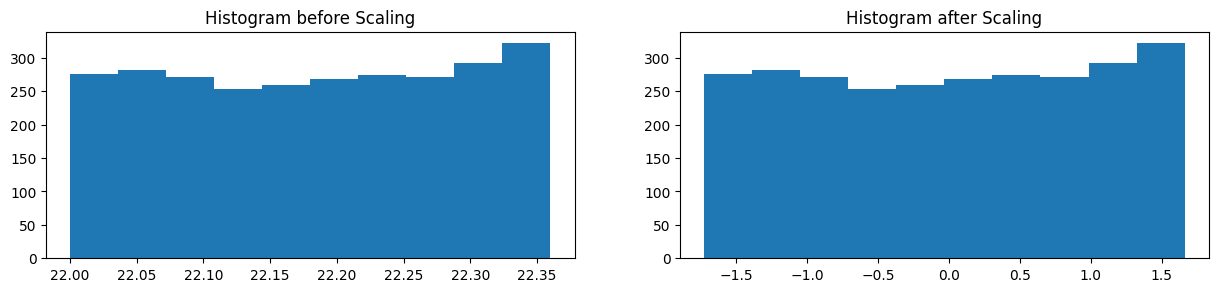

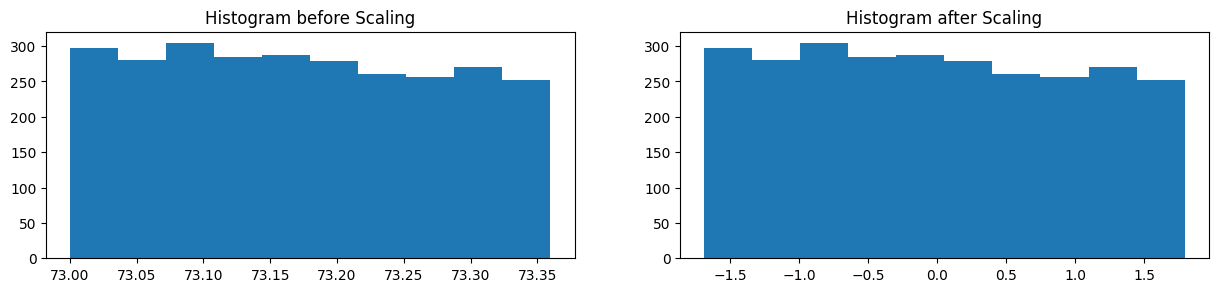

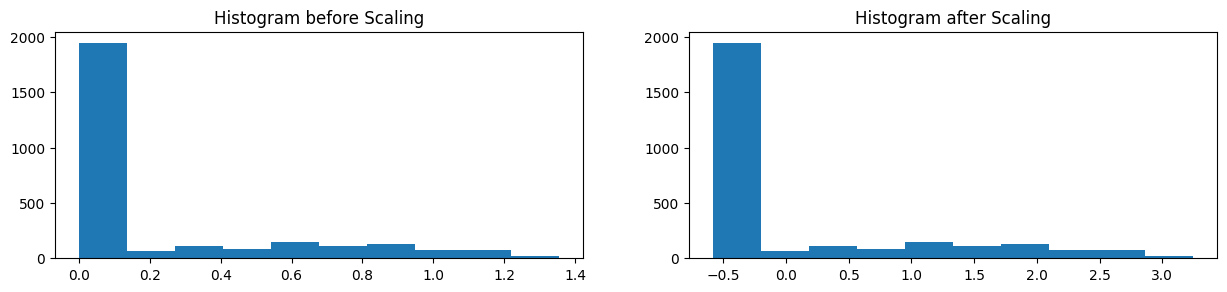

In [30]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    plt.hist(df)
    plt.title("Histogram before Scaling")
    
    plt.subplot(1,2,2)
    scaler = preprocessing.StandardScaler()
    df = scaler.fit_transform(np.array(df).reshape(-1,1))
    plt.hist(df)
    plt.title("Histogram after Scaling")
    plt.show()

## **Log Transformation

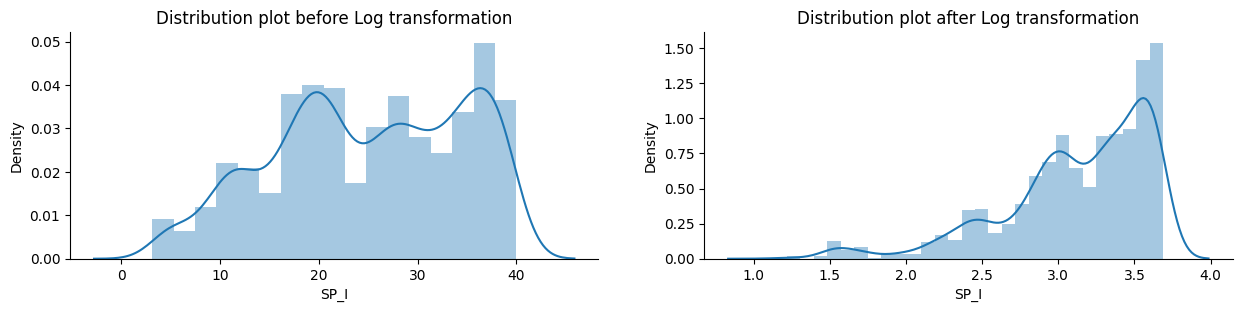

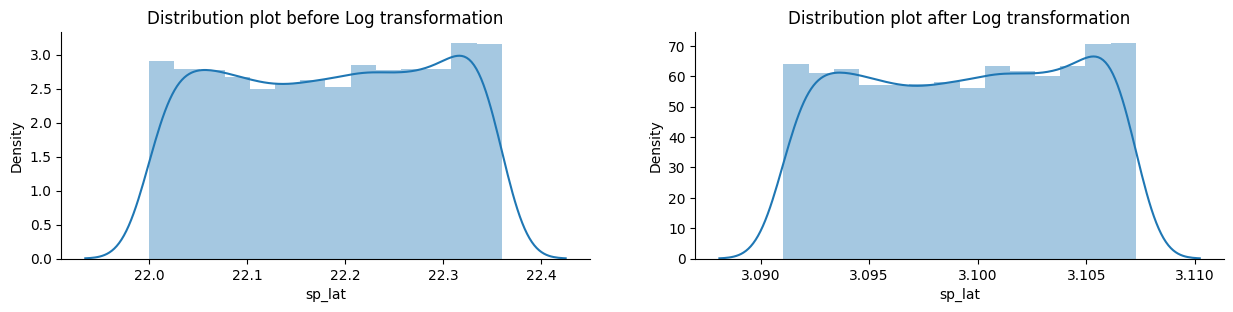

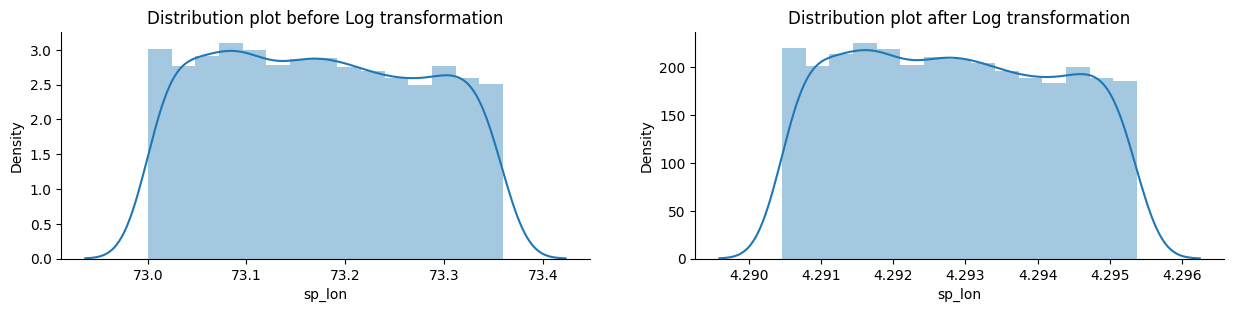

In [31]:
for i in range(1,len(Variables)-1):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    sns.distplot(df)
    plt.title("Distribution plot before Log transformation")
    sns.despine()
    
    plt.subplot(1,2,2)    
    df = np.log(df)
    sns.distplot(df)
    plt.title("Distribution plot after Log transformation")
    sns.despine()
    plt.show()

## **Cube Root Transformation

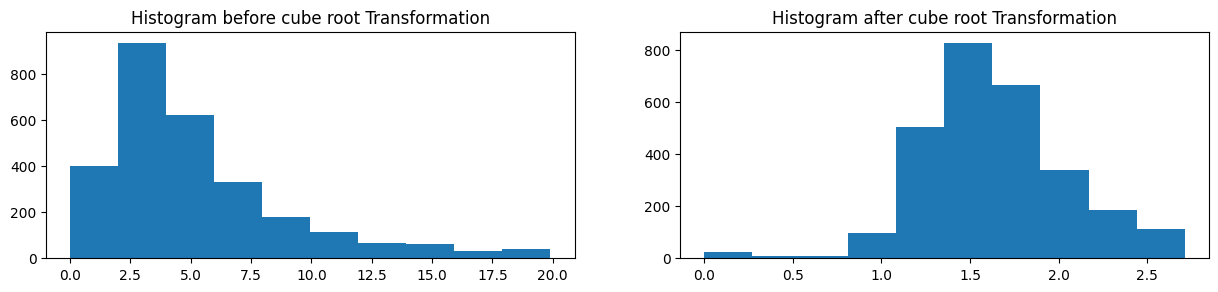

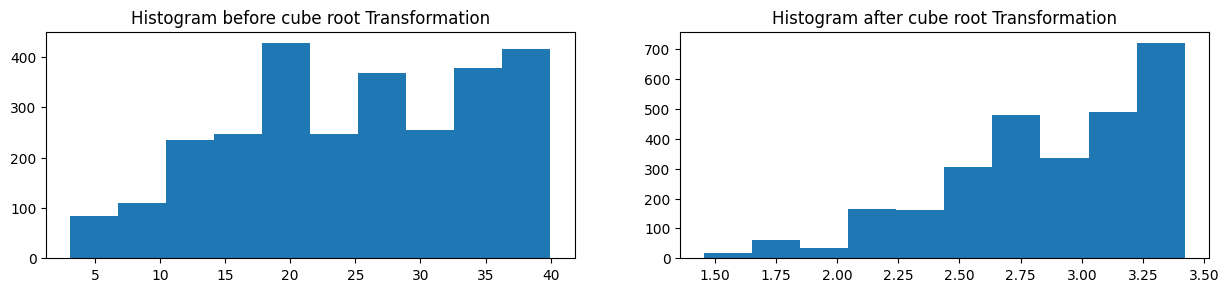

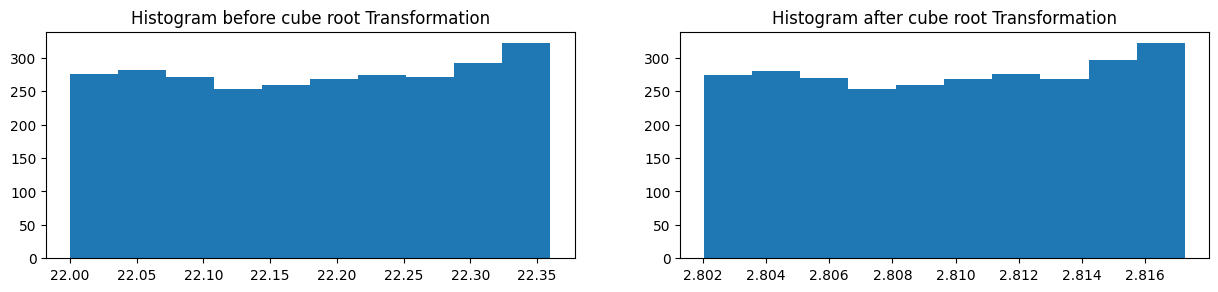

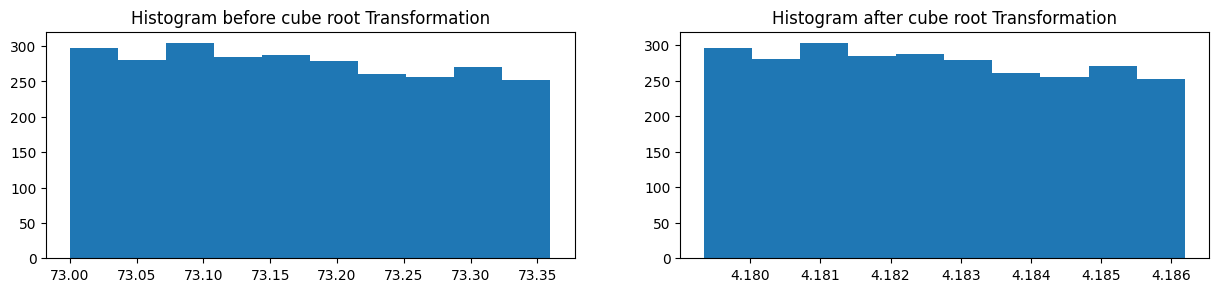

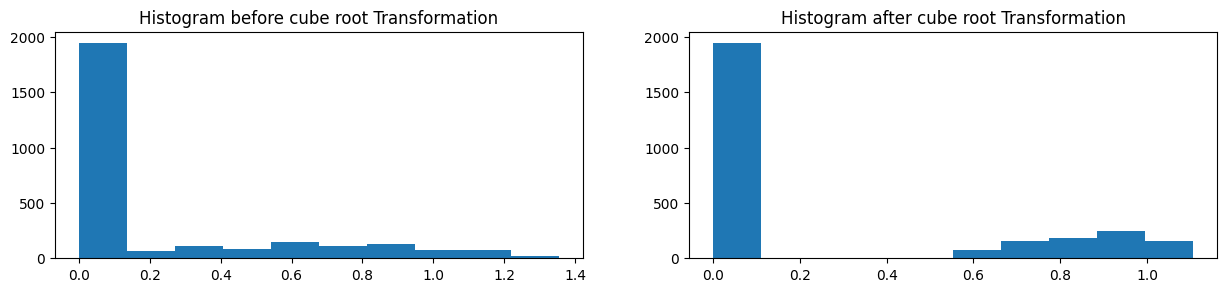

In [32]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    plt.hist(df)
    plt.title("Histogram before cube root Transformation")
    df = (df**(1/3))
    plt.subplot(1,2,2)
    plt.hist(df)
    plt.title("Histogram after cube root Transformation")
    plt.show()

## **Box - Transformation

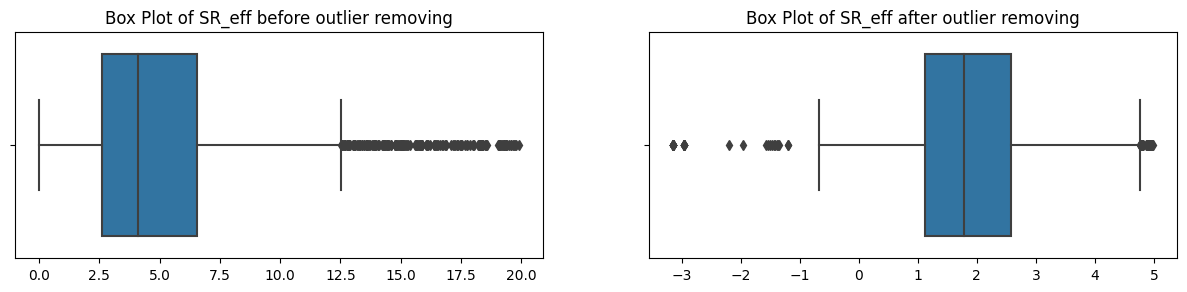

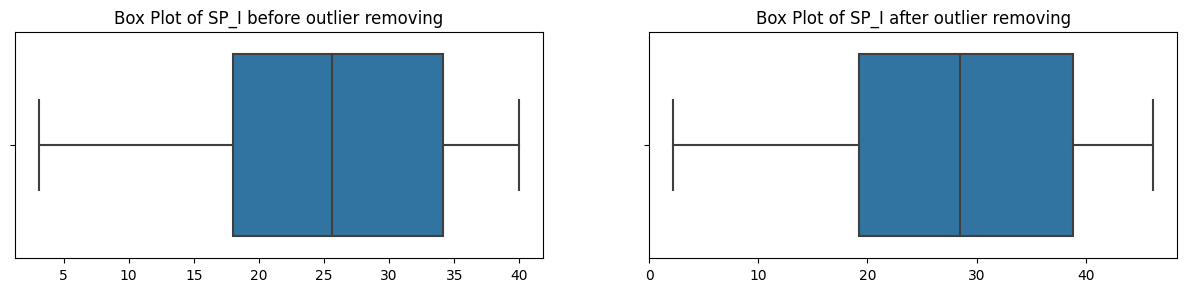

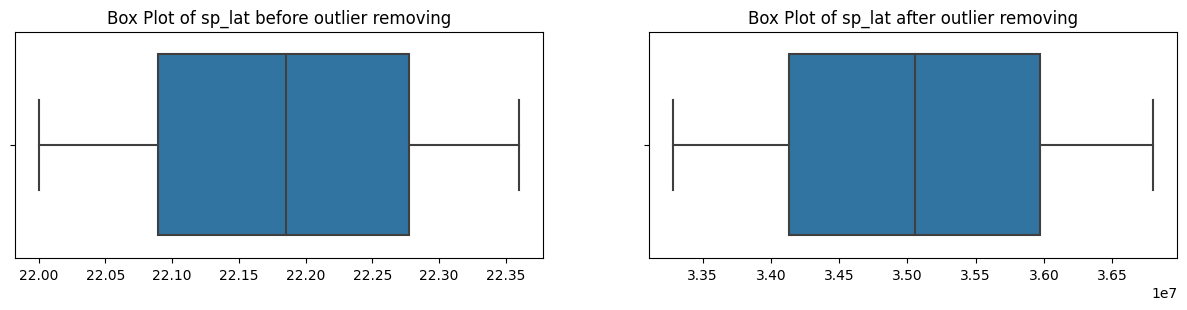

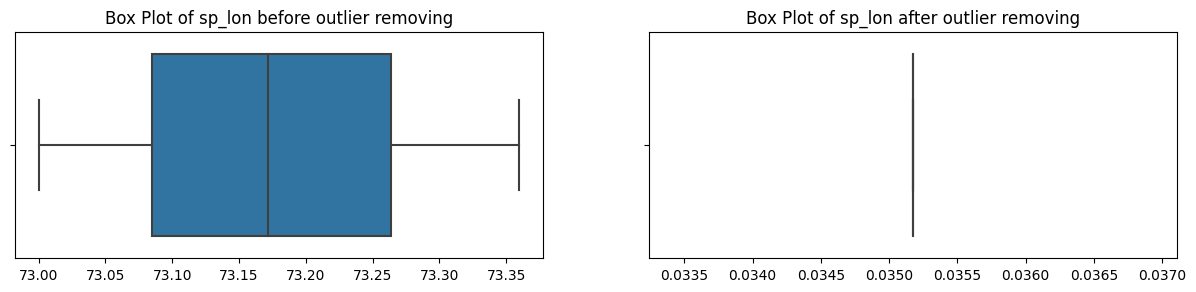

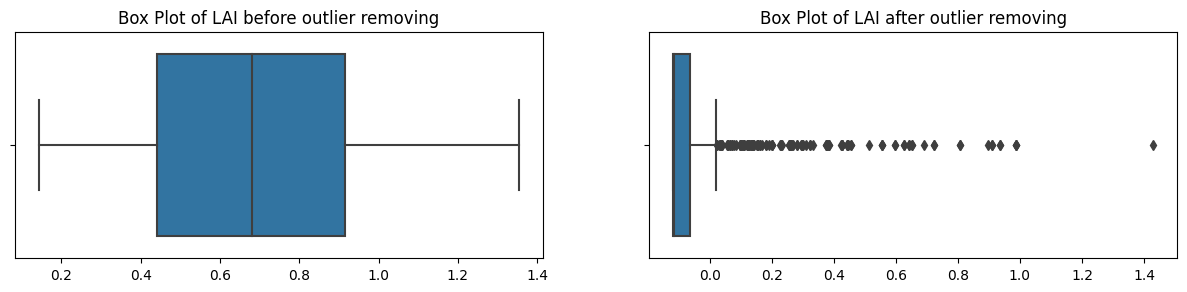

In [33]:
for i in range(len(Variables)):
    dfe = Data[f'{Variables[i]}']
    dfe = pd.DataFrame(dfe)
    dfe = np.array(dfe[dfe>0]).flatten()
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(dfe)
    plt.title(f"Box Plot of {Variables[i]} before outlier removing")
    dfe,fitted_lambda = scipy.stats.boxcox(dfe,lmbda=None)
    plt.subplot(1,2,2)
    sns.boxplot(dfe)
    plt.title(f"Box Plot of {Variables[i]} after outlier removing")
    plt.show()

# **Imputation
+ Like imputation of missing values, we can also impute outliers. 
+ We can use mean, median, zero value in this methods. 
+ Since we imputing there is no loss of data. 
+ Here median is appropriate because it is not affected by outliers.

## **Mean Imputation

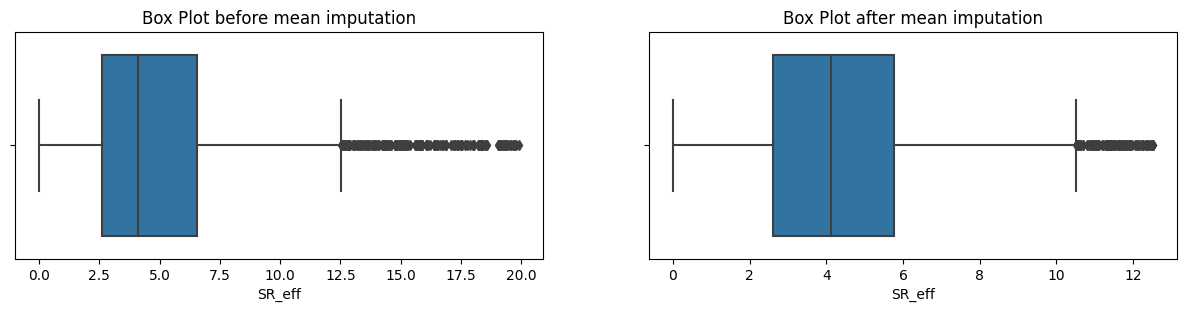

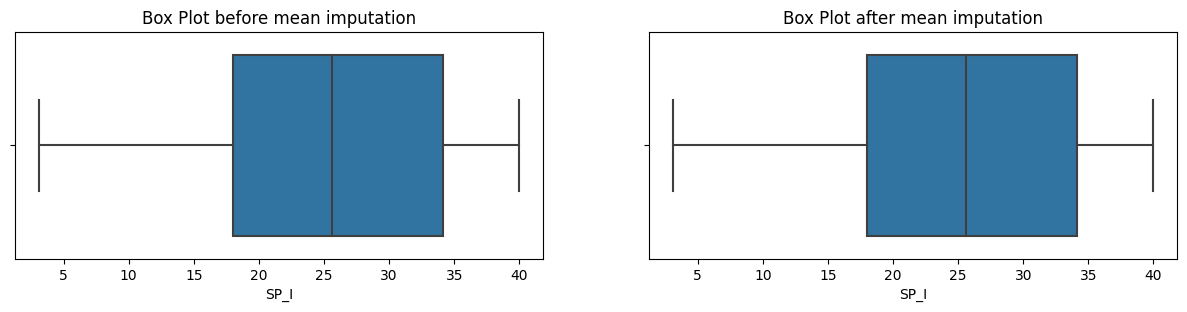

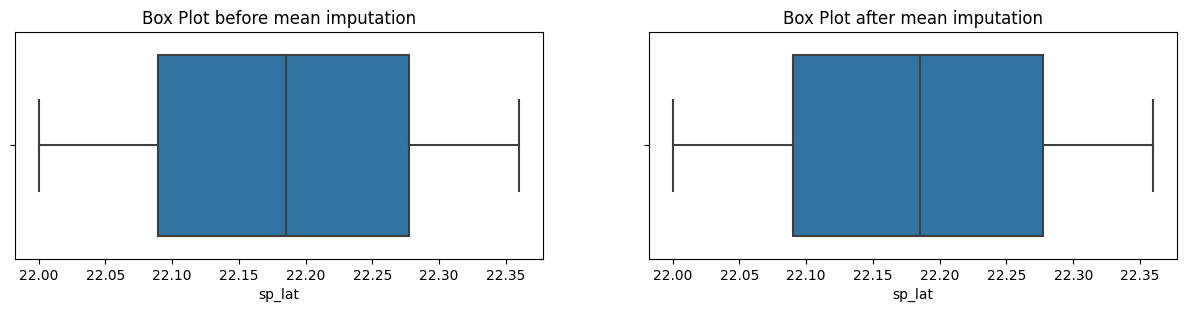

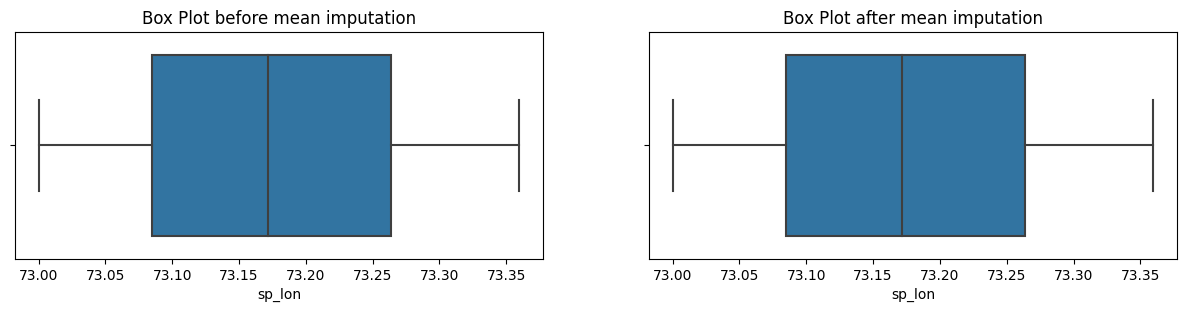

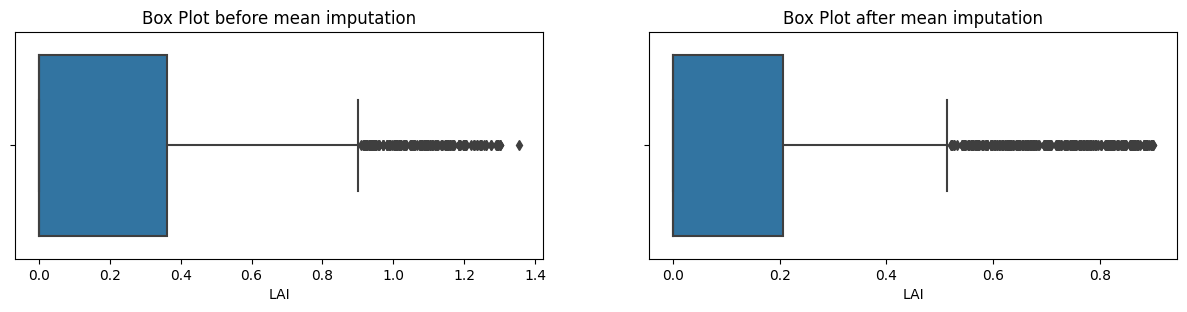

In [34]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.title("Box Plot before mean imputation")
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    m = np.mean(df)
    for i in df:
        if i > Upper_tail or i < Lower_tail:
                df = df.replace(i, m)
    plt.subplot(1,2,2)
    sns.boxplot(df)
    plt.title("Box Plot after mean imputation")
    plt.show()   

## **Median Imputation

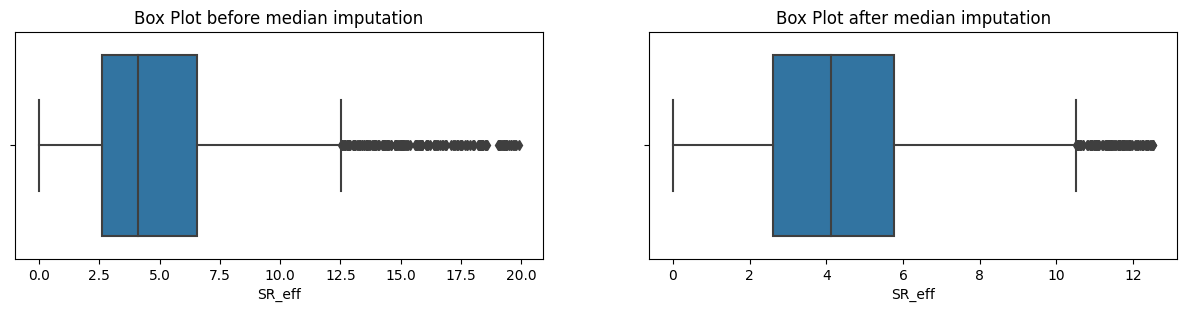

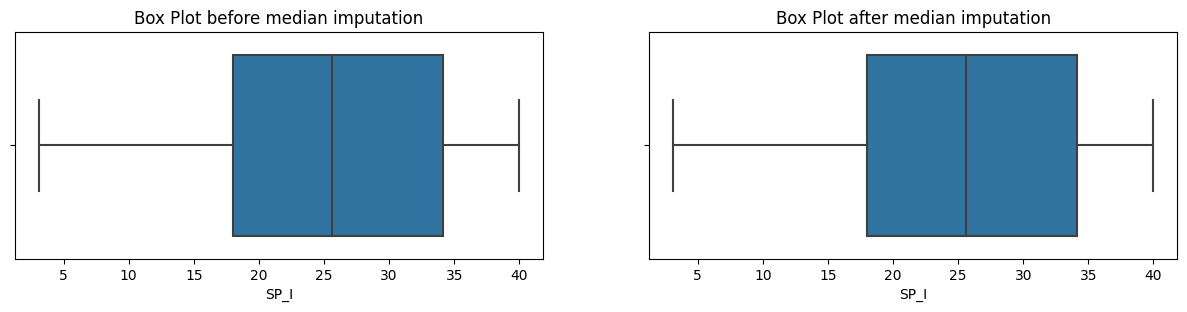

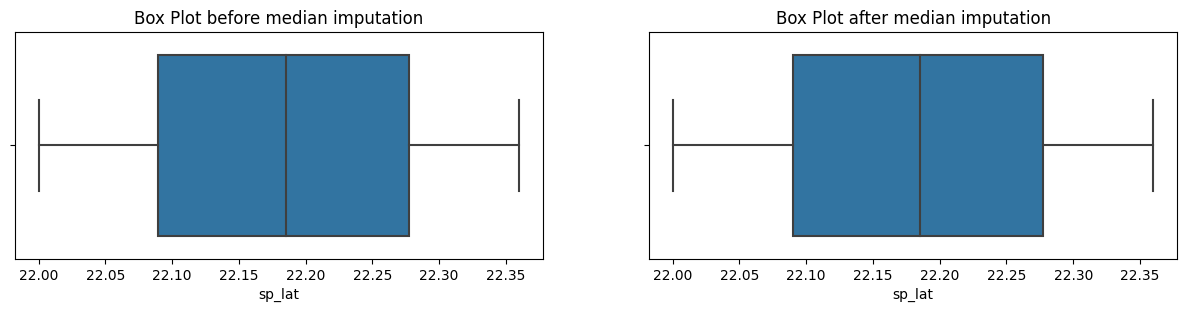

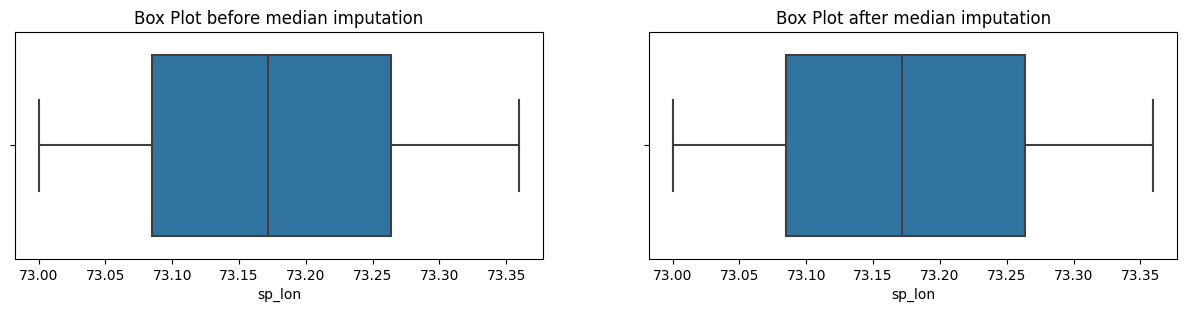

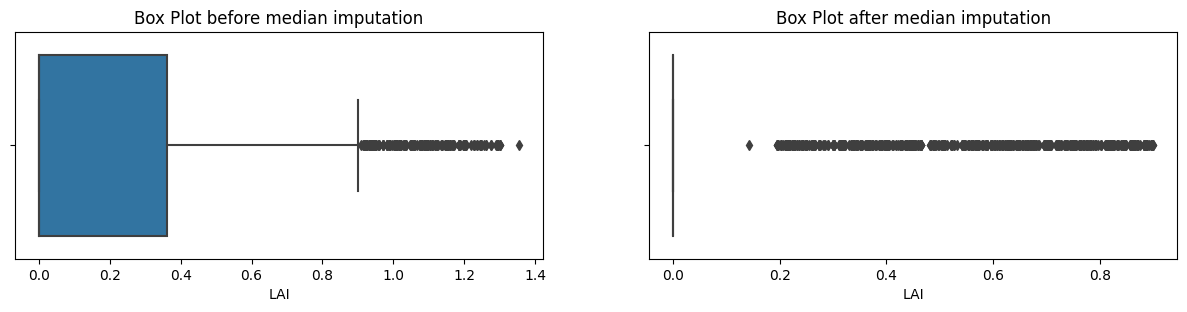

In [35]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.title("Box Plot before median imputation")
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    m = np.median(df)
    for i in df:
        if i > Upper_tail or i < Lower_tail:
                df = df.replace(i, m)
    plt.subplot(1,2,2)
    sns.boxplot(df)
    plt.title("Box Plot after median imputation")
    plt.show()   

+ Median is best measure of central tendency when the data has outlier or skewed.
+ Median imputation completely remove outlier.

## **Zero value imputation

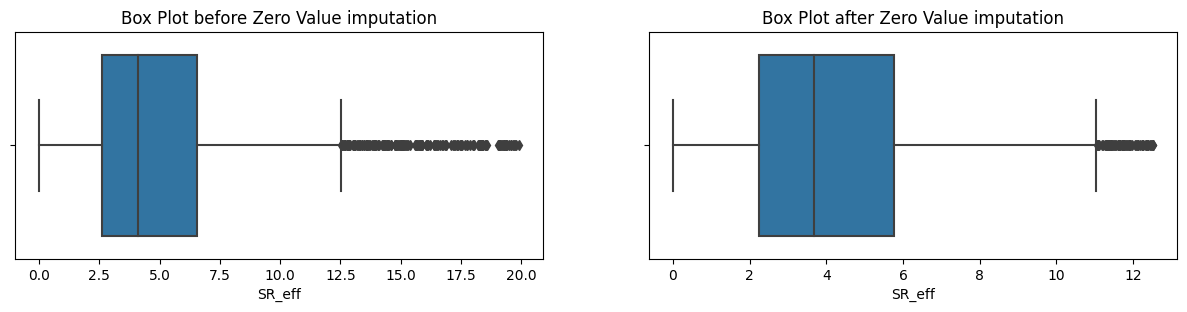

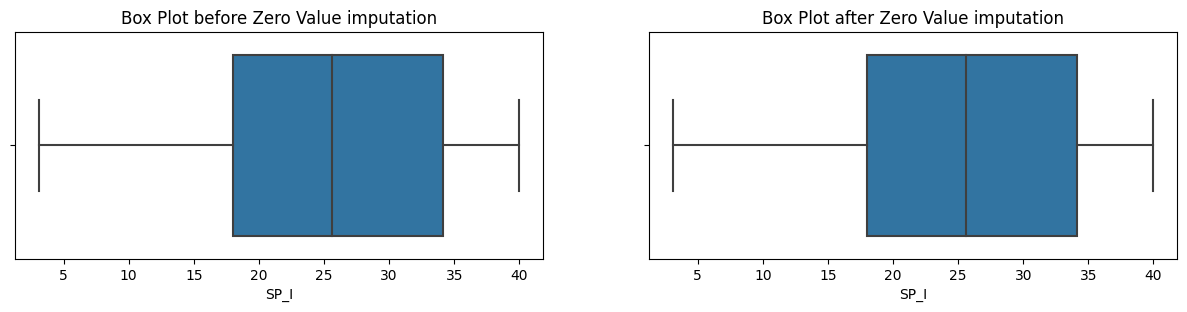

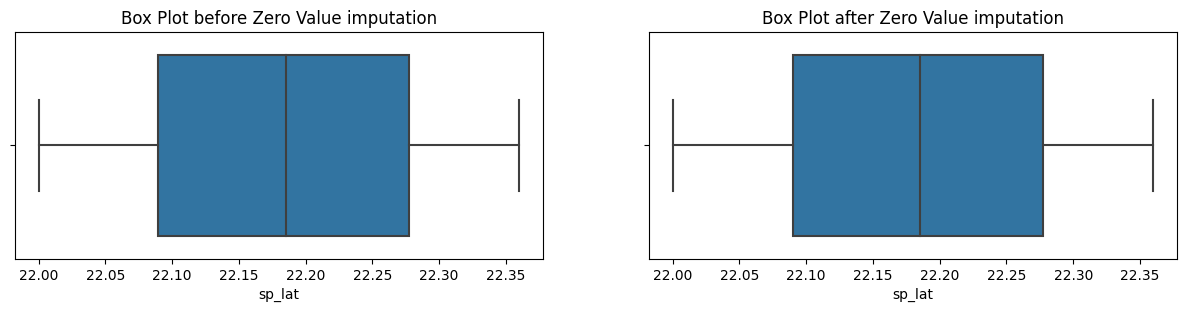

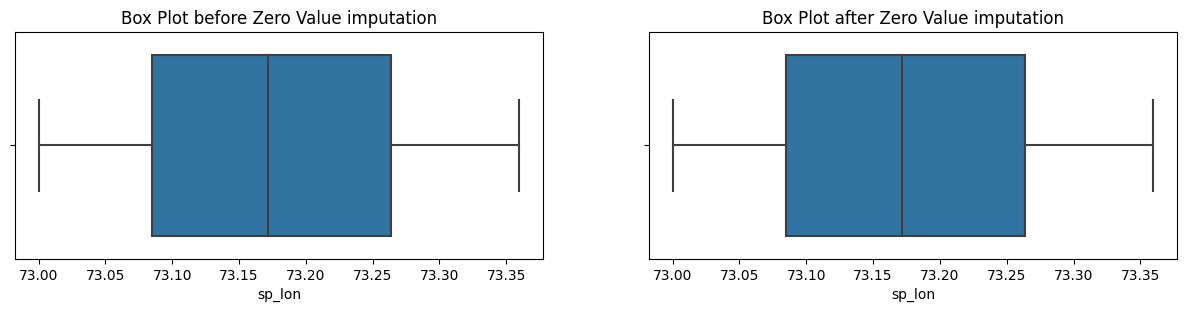

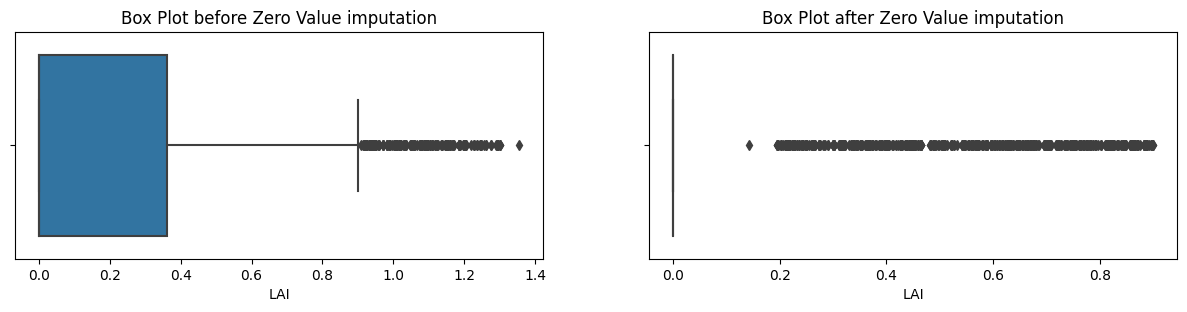

In [36]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.title("Box Plot before Zero Value imputation")
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    
    for i in df:
        if i > Upper_tail or i < Lower_tail:
                df = df.replace(i, 0)
    plt.subplot(1,2,2)
    sns.boxplot(df)
    plt.title("Box Plot after Zero Value imputation")
    plt.show()              

## **Separately Treating
+ If there are significant number of outliers and dataset is small , we should treat them separately in the statistical model. 
+ One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output. 
+ But this technique is tedious when the dataset is large.